In [1]:
import numpy as np 
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt 
%matplotlib inline

In [36]:
""" X_train, y_train = generate_data(n_train = 300, train_only = True, 
                                                   n_features = 4) """

' X_train, y_train = generate_data(n_train = 300, train_only = True, \n                                                   n_features = 4) '

In [37]:
np.random.seed(2019)
records = 100
date_range = pd.date_range('2000-01-01', freq='MS', periods=records)
df = pd.DataFrame(np.random.rand(records, 3), columns=['temp','depth','acceleration'], index=date_range)
df.tail(5)

,temp,depth,acceleration
2007-12-01,0.464489,0.263058,0.184260
2008-01-01,0.785848,0.384297,0.285172
2008-02-01,0.786389,0.418360,0.101536
2008-03-01,0.759092,0.363799,0.275698
2008-04-01,0.940842,0.189912,0.862991


In [38]:
df["speed"] = np.random.randint(30, 600, df.shape[0])
df

,temp,depth,acceleration,speed
2000-01-01,0.903482,0.393081,0.623970,229
2000-02-01,0.637877,0.880499,0.299172,351
2000-03-01,0.702198,0.903206,0.881382,115
2000-04-01,0.405750,0.452447,0.267070,194
2000-05-01,0.162865,0.889215,0.148476,441
...,...,...,...,...
2007-12-01,0.464489,0.263058,0.184260,264
2008-01-01,0.785848,0.384297,0.285172,316
2008-02-01,0.786389,0.418360,0.101536,261
2008-03-01,0.759092,0.363799,0.275698,125


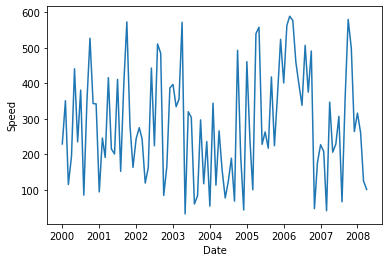

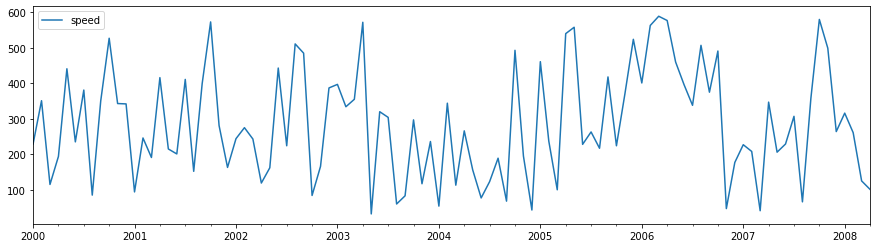

In [39]:
plt.xlabel("Date")
plt.ylabel("Speed")
plt.plot(df["speed"])
df.plot(y=["speed"], figsize=(15,4))


# 

In [7]:
#Rolling statistics calculation
rolmean = df["speed"].rolling(window=12).mean()
rolstd = df["speed"].rolling(window=12).std()
print(rolmean,rolstd)
rolmean.head(12)

2000-01-01           NaN
2000-02-01           NaN
2000-03-01           NaN
2000-04-01           NaN
2000-05-01           NaN
                 ...    
2007-12-01    277.666667
2008-01-01    285.083333
2008-02-01    289.500000
2008-03-01    296.500000
2008-04-01    276.000000
Freq: MS, Name: speed, Length: 100, dtype: float64 2000-01-01           NaN
2000-02-01           NaN
2000-03-01           NaN
2000-04-01           NaN
2000-05-01           NaN
                 ...    
2007-12-01    156.216827
2008-01-01    155.704533
2008-02-01    154.062266
2008-03-01    143.275640
2008-04-01    152.683273
Freq: MS, Name: speed, Length: 100, dtype: float64


2000-01-01           NaN
2000-02-01           NaN
2000-03-01           NaN
2000-04-01           NaN
2000-05-01           NaN
2000-06-01           NaN
2000-07-01           NaN
2000-08-01           NaN
2000-09-01           NaN
2000-10-01           NaN
2000-11-01           NaN
2000-12-01    299.416667
Freq: MS, Name: speed, dtype: float64

In [8]:
rolmean.tail(5)

2007-12-01    277.666667
2008-01-01    285.083333
2008-02-01    289.500000
2008-03-01    296.500000
2008-04-01    276.000000
Freq: MS, Name: speed, dtype: float64

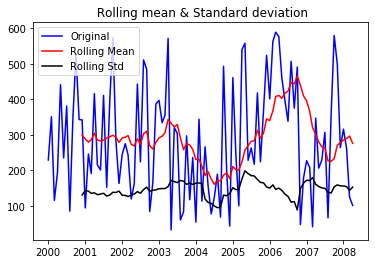

In [40]:
orig = plt.plot(df["speed"], color = "Blue", label = "Original")
mean = plt.plot(rolmean, color = "Red", label = "Rolling Mean")
STD = plt.plot(rolstd, color = "Black", label = "Rolling Std")
plt.title(" Rolling mean & Standard deviation")
plt.legend(loc="best")
plt.show(block =False)


In [10]:
from statsmodels.tsa.stattools import adfuller

fullertest = adfuller(df["speed"],autolag = 'AIC') 

fulleroutput = pd.Series(fullertest[0:4], index = ['test statistic','p-value','lags used','observations used'])
for i,value in fullertest[4].items():
    fulleroutput['final value %s' %i] = value
    
print(fulleroutput)

test statistic       -3.885451
p-value               0.002145
lags used             2.000000
observations used    97.000000
final value 1%       -3.499637
final value 5%       -2.891831
final value 10%      -2.582928
dtype: float64


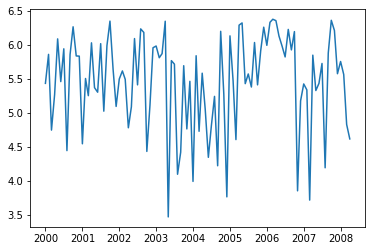

In [41]:
df_logscale = np.log(df["speed"])
plt.plot(df_logscale)

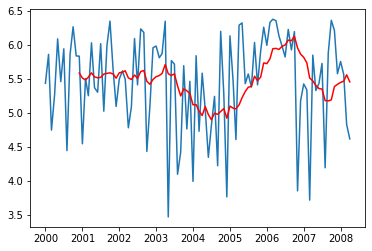

In [42]:
movingmean = df_logscale.rolling(window=12).mean()
movingstd = df_logscale.rolling(window=12).std()
plt.plot(df_logscale)
plt.plot(movingmean,color = "red")

In [43]:
df_logscaleminusmovingmean = df_logscale - movingmean
df_logscaleminusmovingmean.head(12)

2000-01-01         NaN
2000-02-01         NaN
2000-03-01         NaN
2000-04-01         NaN
2000-05-01         NaN
2000-06-01         NaN
2000-07-01         NaN
2000-08-01         NaN
2000-09-01         NaN
2000-10-01         NaN
2000-11-01         NaN
2000-12-01    0.248223
Freq: MS, Name: speed, dtype: float64

In [14]:
#Removing null values
df_logscaleminusmovingmean.dropna(inplace=True)
df_logscaleminusmovingmean.head(12)

2000-12-01    0.248223
2001-01-01   -0.969091
2001-02-01    0.022567
2001-03-01   -0.272769
2001-04-01    0.442074
2001-05-01   -0.158106
2001-06-01   -0.212416
2001-07-01    0.496556
2001-08-01   -0.546593
2001-09-01    0.407569
2001-10-01    0.762520
2001-11-01    0.066603
Freq: MS, Name: speed, dtype: float64

In [15]:
from statsmodels.tsa.stattools import adfuller

def stationarymeantest(x):
    movingmean = x.rolling(window=12).mean()
    movingstd = x.rolling(window=12).std()
    
    
    original = plt.plot(df["speed"], color = "Blue", label = "Original")
    mean = plt.plot(rolmean, color = "Red", label = "Rolling Mean")
    STD = plt.plot(rolstd, color = "Black", label = "Rolling Std")
    plt.title(" Rolling mean & Standard deviation")
    plt.legend(loc="best")
    plt.show(block =False)
    
    fullertest = adfuller(df["speed"],autolag = 'AIC') #AIC gives infor about what we want in time series exact value and actual value
    fulleroutput = pd.Series(fullertest[0:4], index = ['test statistic','p-value','lags used','observations used'])
    for i,value in fullertest[4].items():
        fulleroutput['final value %s' %i] = value
    print(fulleroutput)

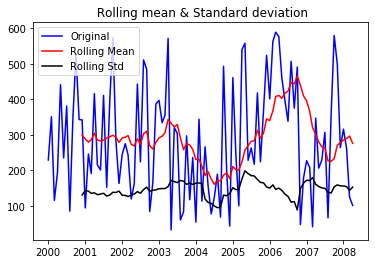

test statistic       -3.885451
p-value               0.002145
lags used             2.000000
observations used    97.000000
final value 1%       -3.499637
final value 5%       -2.891831
final value 10%      -2.582928
dtype: float64


In [16]:
stationarymeantest(df_logscaleminusmovingmean)

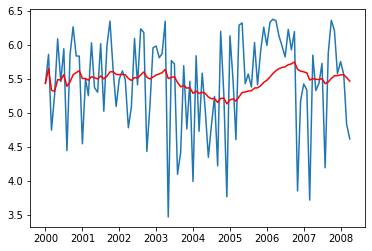

In [17]:
exponentialweightedmean = df_logscale.ewm(halflife=12,min_periods=0,adjust = True).mean()
plt.plot(df_logscale)
plt.plot(exponentialweightedmean,color="red")

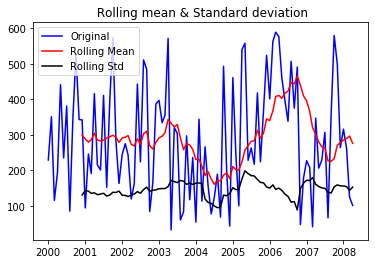

test statistic       -3.885451
p-value               0.002145
lags used             2.000000
observations used    97.000000
final value 1%       -3.499637
final value 5%       -2.891831
final value 10%      -2.582928
dtype: float64


In [32]:
df_logscaleminusexponentialweightedmean = df_logscale - exponentialweightedmean
stationarymeantest(df_logscaleminusexponentialweightedmean)

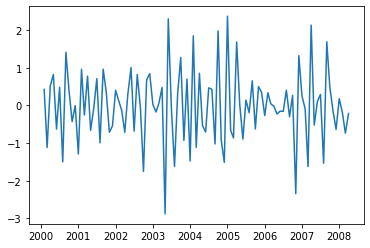

In [33]:
df_logdiffshift = df_logscale - df_logscale.shift()
plt.plot(df_logdiffshift)

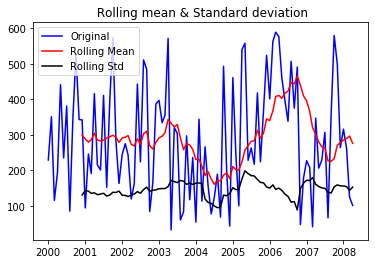

test statistic       -3.885451
p-value               0.002145
lags used             2.000000
observations used    97.000000
final value 1%       -3.499637
final value 5%       -2.891831
final value 10%      -2.582928
dtype: float64


In [20]:
df_logdiffshift.dropna(inplace=True)
stationarymeantest(df_logdiffshift)


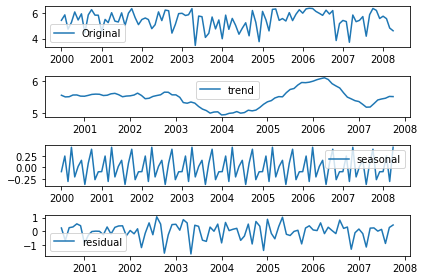

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(df_logscale, label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label = 'trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label = 'seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label = 'residual') 
plt.legend(loc='best')
plt.tight_layout()


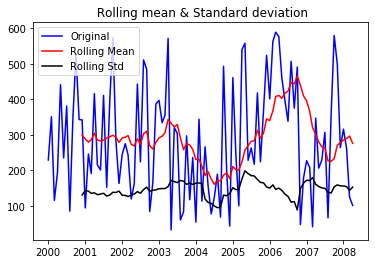

test statistic       -3.885451
p-value               0.002145
lags used             2.000000
observations used    97.000000
final value 1%       -3.499637
final value 5%       -2.891831
final value 10%      -2.582928
dtype: float64


In [34]:
decomposedlogdata = residual
decomposedlogdata.dropna(inplace=True)
stationarymeantest(decomposedlogdata)

C:\Users\kbalivad\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


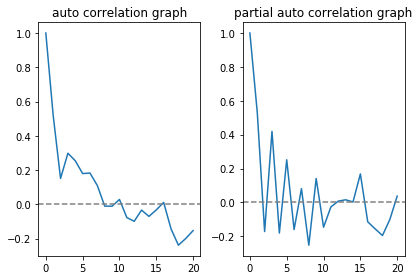

In [23]:
from statsmodels.tsa.stattools import acf,pacf #autocorrelationfunction and partialacf


acf_lagplots = acf(df_logdiffshift,nlags =20)
pacf_lagplots = pacf(df_logdiffshift,nlags =20, method='ols') #ordinaryleastsquare

plt.subplot(121)
plt.plot(acf_lagplots)
plt.axhline(y=0,linestyle='--',color='grey')
plt.title("auto correlation graph")

plt.subplot(122)
plt.plot(pacf_lagplots)
plt.title("partial auto correlation graph")
plt.axhline(y=0,linestyle='--',color='grey')
plt.tight_layout()


C:\Users\kbalivad\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


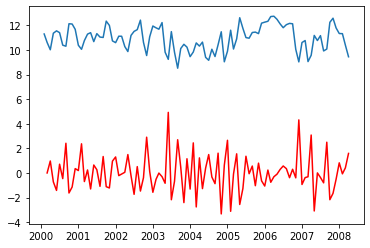

In [24]:
from statsmodels.tsa.arima_model import ARIMA

model =ARIMA(df_logscale,order=(7,2,3))
ar_finalresult= model.fit(disp=-1)
plt.plot(df_logdiffshift)
plt.plot(ar_finalresult.fittedvalues,color='red')


In [25]:
ARIMA_prediction_difference = pd.Series(ar_finalresult.fittedvalues, copy=True)
print(ARIMA_prediction_difference.head(5))

2000-03-01   -0.000264
2000-04-01    0.971616
2000-05-01   -0.726990
2000-06-01   -1.419093
2000-07-01    0.711740
Freq: MS, dtype: float64


In [26]:
#converting into cumulative sum
ARIMA_prediction_difference_cumsum = ARIMA_prediction_difference.cumsum()
print(ARIMA_prediction_difference_cumsum.head(5))

2000-03-01   -0.000264
2000-04-01    0.971352
2000-05-01    0.244362
2000-06-01   -1.174731
2000-07-01   -0.462991
Freq: MS, dtype: float64


In [27]:
ARIMA_Prediction_log = pd.Series(df_logscale.ix[0],index = df_logscale.index)
ARIMA_Prediction_log = ARIMA_Prediction_log.add(ARIMA_prediction_difference,fill_value=0)
ARIMA_Prediction_log.head()

C:\Users\kbalivad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


2000-01-01    5.433722
2000-02-01    5.433722
2000-03-01    5.433458
2000-04-01    6.405338
2000-05-01    4.706732
Freq: MS, dtype: float64

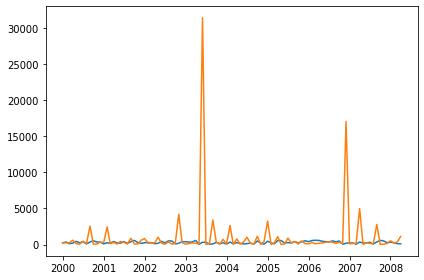

In [28]:
prediction_ARIMA= np.exp(ARIMA_Prediction_log)
plt.plot(df["speed"])
plt.plot(prediction_ARIMA)
plt.tight_layout()

In [29]:
df_logscale.reset_index(level=None, drop=False, inplace=False)


,index,speed
0,2000-01-01,5.433722
1,2000-02-01,5.860786
2,2000-03-01,4.744932
3,2000-04-01,5.267858
4,2000-05-01,6.089045
...,...,...
95,2007-12-01,5.575949
96,2008-01-01,5.755742
97,2008-02-01,5.564520
98,2008-03-01,4.828314


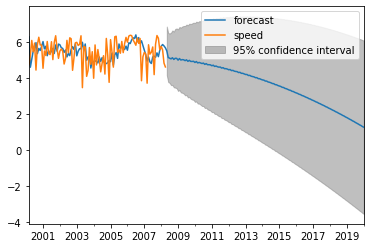

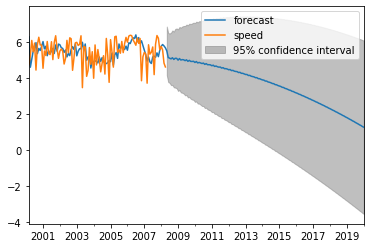

In [30]:
ar_finalresult.plot_predict(2,240)